1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].
Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy
Полученные значения должны быть равны.
Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков, а затем с использованием функций из библиотек numpy и pandas.

In [90]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


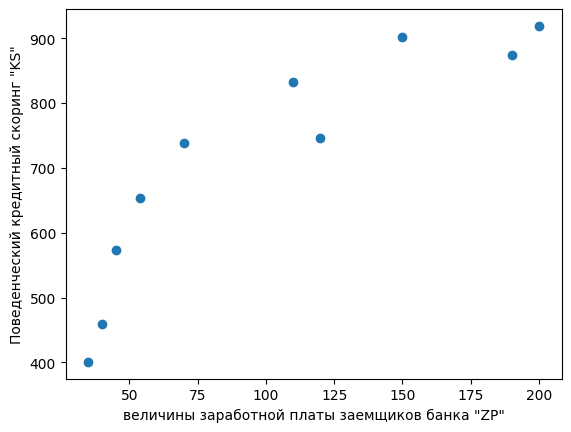

In [91]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
plt.scatter(zp, ks)
plt.xlabel('величины заработной платы заемщиков банка "ZP"')
plt.ylabel('Поведенческий кредитный скоринг "KS"', rotation=90)
plt.show()


Из графика видно, что зависимость линейная. Ожидаем, что между этими данными существует положительная корреляция.  

Вычислим ковариацию двух величин  
$Сov(xy) = M(XY) - M(X)*M(Y)$


In [92]:
cov_zp_ks = np.mean(zp*ks) - np.mean(zp)*np.mean(ks)
cov_zp_ks


9157.839999999997

Вычислим ковариацию двух величин через функцию $cov$

In [93]:
cov_zp_ks = np.cov(zp, ks, ddof=0)[0, 1]
cov_zp_ks


9157.840000000002

Вычислим коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков:

$corr(zp, ks) = \frac{Cov(zp, ks)}{\sqrt{Var(zp)}\sqrt{Var(ks)}}$  

$r = \frac{\operatorname{cov}(zp, ks)}{\sigma_{zp} \sigma_{ks}}$  


In [94]:
corr_coef = cov_zp_ks / (np.std(zp, ddof=0) * np.std(ks, ddof=0))
corr_coef


0.8874900920739163

***Библиотека Numpy***

In [95]:
corr_numpy = np.corrcoef(zp, ks)[0][1]
corr_numpy


0.8874900920739162

***Библиотека Pandas***

In [96]:
corr_pandas = pd.Series(zp).corr(pd.Series(ks), method='pearson')
corr_pandas


0.8874900920739162

2. Измерены значения IQ выборки студентов,
обучающихся в местных технических вузах:
131, 125, 115, 122, 131, 115, 107, 99, 125, 111.
Известно, что в генеральной совокупности IQ распределен нормально.
Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [97]:
iq = np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])
alpha = 0.05


Используем $t$-критерий и формулу для среднего арифмитического:    
$\overline{X}\underline{+}t\frac{\alpha}{2}*\frac{\sigma}{\sqrt{n}}$ 

In [98]:
n = iq.size
std = iq.std(ddof=1)
mean = iq.mean()
print(
    f'\033[31m Размер выборки: n = {n}\n'f' Среднее квадратическое отклонение по выборке(несмещенное): {std:.2f}\n'f' Среднее выборочное: {mean:.2f}')


 Размер выборки: n = 10
 Среднее квадратическое отклонение по выборке(несмещенное): 10.55
 Среднее выборочное: 118.10


Cчитаем значения $t$ и отклонение

In [99]:
t = stats.t.ppf(1 - alpha / 2, n - 1)
d = t * std / (n) ** 0.5
d, t


(7.543916348412745, 2.2621571627409915)

Считаем доверительный интервал

In [100]:
min = mean - d
max = mean + d
print(
    f' Доверительный интервал для математического ожидания с надежностью 0.95 составляет:{min: .2f};{max: .2f}')


 Доверительный интервал для математического ожидания с надежностью 0.95 составляет: 110.56; 125.64


3. Известно, что рост футболистов в сборной распределен нормально с дисперсией генеральной совокупности, равной 25 кв.см. Объем выборки равен 27, среднее выборочное составляет 174.2. Найдите доверительный интервал для математического ожидания с надежностью 0.95.

Используем $z$-критерий и формулу для среднего арифмитического:    
$\overline{X}\underline{+}z\frac{\alpha}{2}*\frac{\sigma}{\sqrt{n}}$ 

In [101]:
var = 25
n = 27
mean = 174.2
std = (var)**0.5
alpha = 0.05
z = stats.norm.ppf(1-alpha/2, n-1)
d = z*std/(n)**0.5
min = mean - d
max = mean + d
print(
    f"Доверительный интервал для математического ожидания с надежностью 0.95 составляет:{min: .2f};{max: .2f}")


Доверительный интервал для математического ожидания с надежностью 0.95 составляет: 147.30; 201.10
